### Imports

In [1]:
# !pip install matplotlib==3.5.0

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import time
from typing import List
import random as rnd
import matplotlib
import json
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

### Global Constants

In [3]:
agent_num = 2000
search_iteration = 300
landscape_repetitions = 200

### Data Ingestion

In [4]:
n8k0_results = {}
n8k3_results = {}
n8k7_results = {}

n12k0_results = {}
n12k7_results = {}
n12k11_results = {}

## When running locally or elsewhere, replace the file path(s) with the correct path(s)
with open('/content/nfr_intro_N8K0_results.json') as json_file:
    n8k0_results = json.load(json_file)
with open('/content/nfr_intro_N8K3_results.json') as json_file:
    n8k3_results = json.load(json_file)
with open('/content/nfr_intro_N8K7_results.json') as json_file:
    n8k7_results = json.load(json_file)

with open('/content/nfr_intro_N12K0_results.json') as json_file:
    n12k0_results = json.load(json_file)
with open('/content/nfr_intro_N12K5_results.json') as json_file:
    n12k5_results = json.load(json_file)
with open('/content/nfr_intro_N12K11_results.json') as json_file:
    n12k11_results = json.load(json_file)

### Global Methods

---
Use this method `plot_results(results)` to plot the graph for any results. (i.e., call `plot_results(n8k0_results)`). Keep in mind that the y-axis of the magnified graph may need to be adjusted depending on where the lines converge.

In [5]:
def plot_results(res):
    font = {'size': 14}
    matplotlib.rc('font', **font)

    x = range(search_iteration)
    fig, ax = plt.subplots(figsize=(15, 10))

    # plt.yscale('log')
    # plt.gca().invert_yaxis()
    ax.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])

    # for name, vals in n8k7_results.items():
    #     ax.plot(x, 1-np.array(vals), label=f"{name}")
    for name, vals in res.items():
        ax.plot(x, np.array(vals), label=f"{name}")

    #plt.gca().set_yticklabels(1-plt.gca().get_yticks())

    plt.ylabel("Performance")
    plt.xlabel("Steps")
    plt.title("NFR Introduction")


    font = {'size': 12}
    matplotlib.rc('font', **font)

    l, b, h, w = .45, .2, .05, .4
    ax2 = fig.add_axes([l, b, w, h])
    cmap = matplotlib.cm.cool
    norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

    cb1 = matplotlib.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    ax2.set(frame_on=False) 
    cb1.set_label('Introduction Step')


    l, b, h, w = .45, .35, .4, .4
    ax3 = fig.add_axes([l, b, w, h])
    ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
    for name, vals in res.items():
        ax3.plot(x, np.array(vals), label=f"{name}")
    ax3.set_ylim([0.83, 0.855])
    ax3.set(alpha=0.01)
    ax3.set_ylabel("Performance")
    ax3.set_xlabel("Steps")
    ax3.set_title("Convergence Point (Magnified)")

    plt.show()

### N8


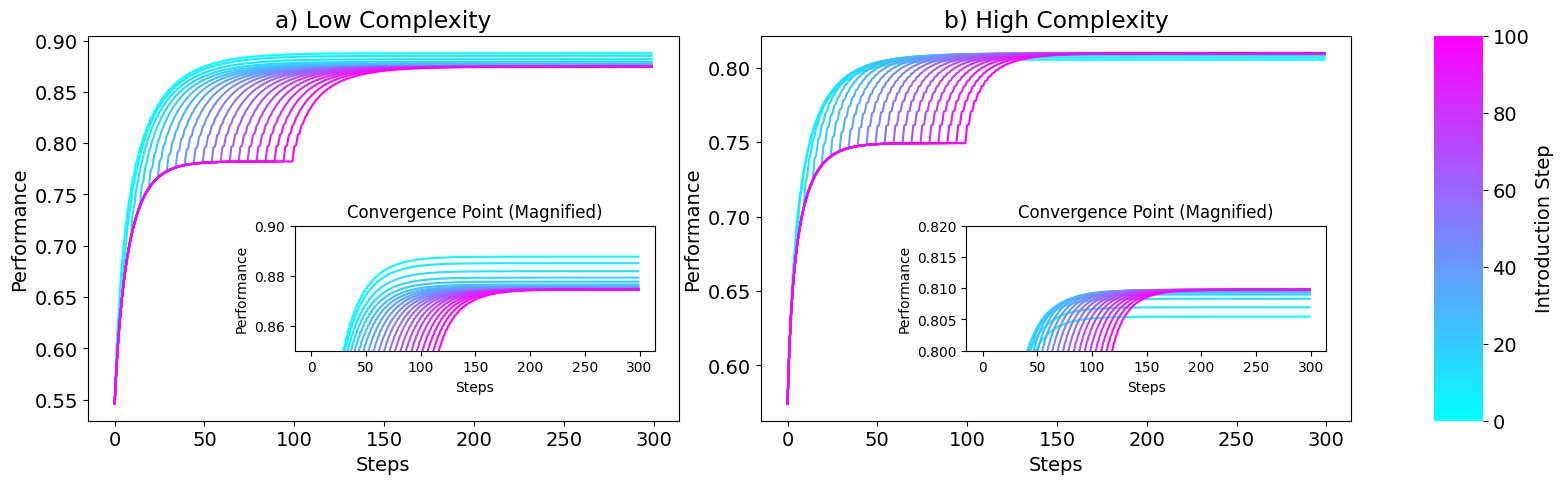

In [6]:
font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [3, 3, 0.25]})
x = range(search_iteration)

ax.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n8k0_results.items():
    ax.plot(x, np.array(vals), label=f"{name}")
ax.set_ylabel("Performance")
ax.set_xlabel("Steps")
ax.set_title("a) Low Complexity")

ax1.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n8k7_results.items():
    ax1.plot(x, np.array(vals), label=f"{name}")
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("b) High Complexity")

cmap = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

cb1 = matplotlib.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
ax2.set(frame_on=False) 
cb1.set_label('Introduction Step')


font = {'size': 10}
matplotlib.rc('font', **font)

l, b, h, w = .24, .25, .25, .2
ax3 = fig.add_axes([l, b, w, h])
ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n8k0_results.items():
    ax3.plot(x, np.array(vals), label=f"{name}")
ax3.set_ylim([0.85, 0.9])
ax3.set_ylim([0.85, 0.9])
ax3.set(alpha=0.9)
ax3.set_ylabel("Performance")
ax3.set_xlabel("Steps")
ax3.set_title("Convergence Point (Magnified)")

l, b, h, w = .613, .25, .25, .2
ax3 = fig.add_axes([l, b, w, h])
ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n8k7_results.items():
    ax3.plot(x, np.array(vals), label=f"{name}")
ax3.set_ylim([0.8, 0.82])
ax3.set(alpha=0.01)
ax3.set_ylabel("Performance")
ax3.set_xlabel("Steps")
ax3.set_title("Convergence Point (Magnified)")

plt.show()

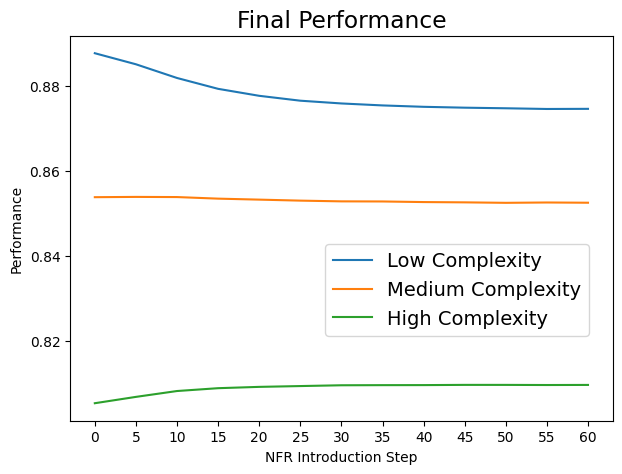

In [7]:
plt.subplots(figsize=(7, 5))
font = {'size': 14}
matplotlib.rc('font', **font)

labels = [str(i) for i in range(0, 105, 5)]
last_element = 13#len(labels)

n8k0 = []
n8k3 = []
n8k7 = []
for name, vals in n8k0_results.items():
    n8k0.append(vals[-1])
for name, vals in n8k3_results.items():
    n8k3.append(vals[-1])
for name, vals in n8k7_results.items():
    n8k7.append(vals[-1])

plt.plot(labels[0:last_element], n8k0[0:last_element], label=f"Low Complexity")
plt.plot(labels[0:last_element], n8k3[0:last_element], label=f"Medium Complexity")
plt.plot(labels[0:last_element], n8k7[0:last_element], label=f"High Complexity")

plt.legend(loc=(0.47, 0.22))
plt.ylabel("Performance")
plt.xlabel("NFR Introduction Step")
plt.title("Final Performance")

plt.show()

In [8]:
def plot_results(res):
    font = {'size': 14}
    matplotlib.rc('font', **font)

    x = range(search_iteration)
    fig, ax = plt.subplots(figsize=(15, 10))

    # plt.yscale('log')
    # plt.gca().invert_yaxis()
    ax.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])

    # for name, vals in n8k7_results.items():
    #     ax.plot(x, 1-np.array(vals), label=f"{name}")
    for name, vals in res.items():
        ax.plot(x, np.array(vals), label=f"{name}")

    #plt.gca().set_yticklabels(1-plt.gca().get_yticks())

    plt.ylabel("Performance")
    plt.xlabel("Steps")
    plt.title("NFR Introduction")


    font = {'size': 12}
    matplotlib.rc('font', **font)

    l, b, h, w = .45, .2, .05, .4
    ax2 = fig.add_axes([l, b, w, h])
    cmap = matplotlib.cm.cool
    norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

    cb1 = matplotlib.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    ax2.set(frame_on=False) 
    cb1.set_label('Introduction Step')


    l, b, h, w = .45, .35, .4, .4
    ax3 = fig.add_axes([l, b, w, h])
    ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
    for name, vals in res.items():
        ax3.plot(x, np.array(vals), label=f"{name}")
    ax3.set_ylim([0.83, 0.855])
    ax3.set(alpha=0.01)
    ax3.set_ylabel("Performance")
    ax3.set_xlabel("Steps")
    ax3.set_title("Convergence Point (Magnified)")

    plt.show()

#### Extra Plots


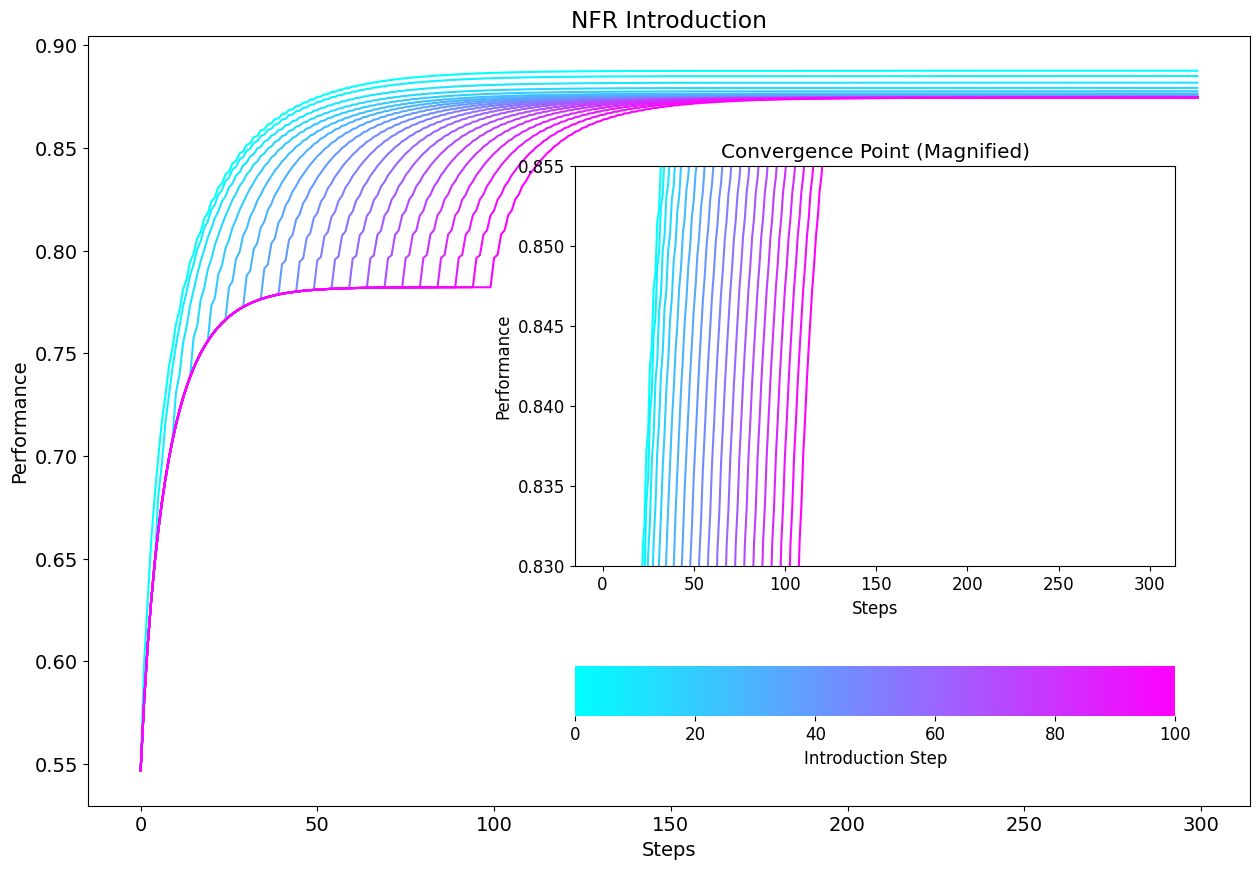

In [9]:
plot_results(n8k0_results)

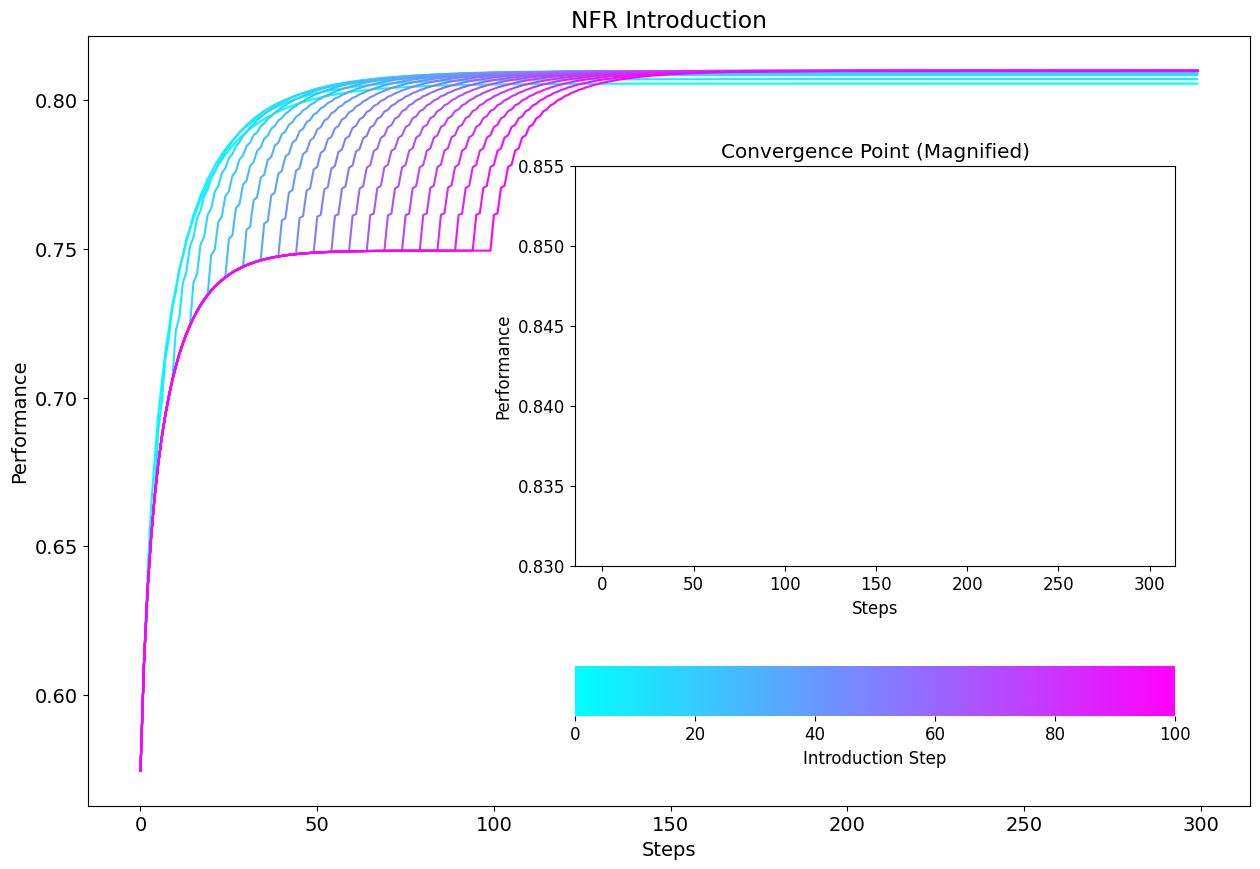

In [10]:
plot_results(n8k7_results)

###N12

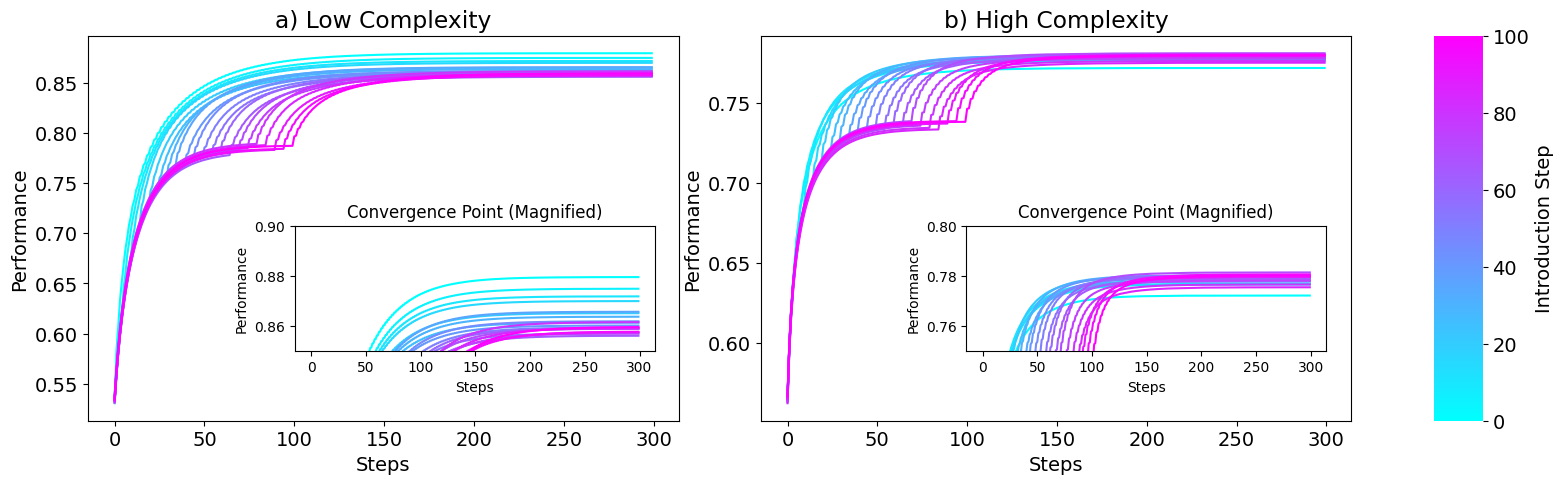

In [11]:
font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [3, 3, 0.25]})
x = range(search_iteration)

ax.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n12k0_results.items():
    ax.plot(x, np.array(vals), label=f"{name}")
ax.set_ylabel("Performance")
ax.set_xlabel("Steps")
ax.set_title("a) Low Complexity")

ax1.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n12k11_results.items():
    ax1.plot(x, np.array(vals), label=f"{name}")
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("b) High Complexity")

cmap = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

cb1 = matplotlib.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
ax2.set(frame_on=False) 
cb1.set_label('Introduction Step')


font = {'size': 10}
matplotlib.rc('font', **font)

l, b, h, w = .24, .25, .25, .2
ax3 = fig.add_axes([l, b, w, h])
ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n12k0_results.items():
    ax3.plot(x, np.array(vals), label=f"{name}")
# ax3.set_ylim([0.85, 0.9])
ax3.set_ylim([0.85, 0.9])
ax3.set(alpha=0.9)
ax3.set_ylabel("Performance")
ax3.set_xlabel("Steps")
ax3.set_title("Convergence Point (Magnified)")

l, b, h, w = .613, .25, .25, .2
ax3 = fig.add_axes([l, b, w, h])
ax3.set_prop_cycle('color', [plt.cm.cool(i) for i in np.linspace(0, 1, 21)])
for name, vals in n12k11_results.items():
    ax3.plot(x, np.array(vals), label=f"{name}")
ax3.set_ylim([0.75, 0.8])
ax3.set(alpha=0.01)
ax3.set_ylabel("Performance")
ax3.set_xlabel("Steps")
ax3.set_title("Convergence Point (Magnified)")

plt.show()

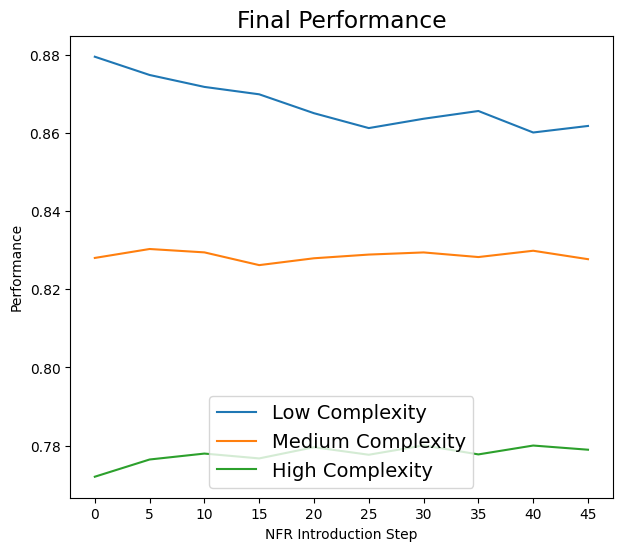

In [12]:
plt.subplots(figsize=(7, 6))
font = {'size': 14}
matplotlib.rc('font', **font)

last_element = 10

labels = [str(i) for i in range(0, 105, 5)]
n12k0 = [] # ["Perfectly Modular", "Imperfectly Modular", "Non-modular"]
n12k5 = []
n12k11 = []
for name, vals in n12k0_results.items():
    n12k0.append(vals[-1])
for name, vals in n12k5_results.items():
    n12k5.append(vals[-1])
for name, vals in n12k11_results.items():
    n12k11.append(vals[-1])

plt.plot(labels[0:last_element], n12k0[0:last_element], label=f"Low Complexity")
plt.plot(labels[0:last_element], n12k5[0:last_element], label=f"Medium Complexity")
plt.plot(labels[0:last_element], n12k11[0:last_element], label=f"High Complexity")

plt.legend()
plt.ylabel("Performance")
plt.xlabel("NFR Introduction Step")
plt.title("Final Performance")

plt.show()